# Exam 2024

In [1]:
import os
import cv2
import numpy as np
from cv02504.util_functions import *

In [2]:
folder = "materials_2024/"

In [3]:
# Q1: projection
K = camera_intrinsic(1400, (750, 520))
R = cv2.Rodrigues(np.array([0.2, 0.2, -0.1]))[0]
t = np.array([[-0.08, 0.01, 0.03]]).T
Q = np.array([[-0.38, 0.1, 1.32]]).T

ans = project_points(K, R, t, Q)
ans

array([[557.52555675],
       [383.75661509]])

In [28]:
# Q2: homography
p1 = np.array([[ 1.45349587e+02, -1.12915131e-01, 1.91640565e+00, -6.08129962e-01],
               [ 1.05603820e+02, 5.62792554e-02, 1.79040110e+00, -2.32182177e-01]])
p2 = np.array([[ 1.3753556, -1.77072961, 2.94511795, 0.04032374],
               [0.30936653, 0.37172814, 1.44007577, -0.03173825]])

H = hest(p1, p2, False)
H/H[0,0]    # to get same scale as options

array([[ 1.        ,  1.18450189,  2.73494707],
       [ 1.28494954,  1.44207391,  1.03919164],
       [ 3.92261028, -2.06451   , -4.72549386]])

In [34]:
# Checking
q20 = PiInv(p2[:,0].reshape((2,1)))
q10 = Pi(H @ q20)
q10

array([[145.349587],
       [105.60382 ]])

In [5]:
# Q4: distortion
K = np.array([[300, 0, 840], [0, 300, 620], [0, 0, 1]], float)
k3 = -0.2
k5 = 0.01
k7 = -0.03
distCoeffs = [k3, k5, k7]
p = np.array([[400, 500]]).T

temp = np.linalg.inv(K) @ PiInv(p)
pd = distort(temp, distCoeffs)
Pi(pd)

array([[-1.46666667],
       [-0.4       ]])

In [6]:

temp = np.linalg.inv(K) @ PiInv(p)
pd = distort(temp, distCoeffs)
pd

array([[-0.32393464],
       [-0.08834581],
       [ 0.22086453]])

In [7]:
Kinv = np.linalg.inv(K)
q = np.array([[400, 500]]).T
p = Kinv @ PiInv(q)
Pi(distort(p, distCoeffs))

array([[-1.46666667],
       [-0.4       ]])

dict_keys(['g*(I_x^2)', 'g*(I_y^2)', 'g*(I_x I_y)'])
r.shape: (5, 5)


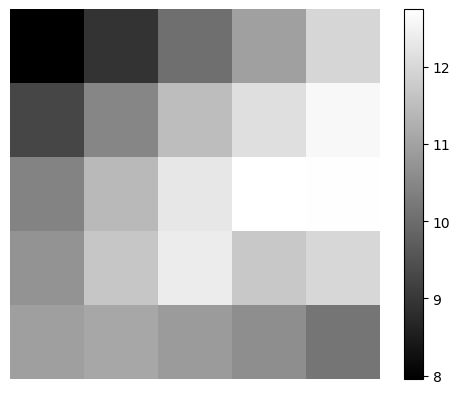

Corners found at [[1, 2], [2, 3]]


In [8]:
# Q6: harris corner
data = np.load(folder+"harris.npy", allow_pickle=True).item()
print(data.keys())

gxx = data["g*(I_x^2)"]
gyy = data["g*(I_y^2)"]
gxy = data["g*(I_x I_y)"]

k = 0.06
tau = 5

# Structure tensor
C = np.array([[gxx, gxy], [gxy, gyy]])

# Harris measure
a = C[0, 0]
b = C[1, 1]
c = C[0, 1]
r = a * b - c**2 - k * (a + b) ** 2
print(f"r.shape: {r.shape}")

# Perform 4-neigbourhood non-max suppression
c = []
for i in range(1, gxx.shape[0] - 1):
    for j in range(1, gxx.shape[1] - 1):
        if (
            r[i, j] > r[i + 1, j]
            and r[i, j] >= r[i - 1, j]
            and r[i, j] > r[i, j + 1]
            and r[i, j] >= r[i, j - 1]
            and r[i, j] > tau
        ):  # Threshold
            c.append([i, j])

plt.imshow(r, cmap='gray')
plt.gca().invert_yaxis() # Origin at top-left corner
plt.axis('off')
plt.colorbar()
plt.show()
print(f"Corners found at {c}")
# Correct answer is found if 8-neighborhood 
# non-max suppresssion is used

In [9]:
r

array([[10.9484, 11.0936, 10.8734, 10.6226, 10.1624],
       [10.7104, 11.6746, 12.38  , 11.7166, 11.9926],
       [10.4324, 11.4216, 12.2894, 12.7506, 12.7164],
       [ 9.2844, 10.4834, 11.5136, 12.135 , 12.6104],
       [ 7.9566,  8.9254, 10.0526, 10.9664, 11.9816]])

In [10]:
# Q9: SIFT
sift_data = np.load(folder + "sift_data.npy", allow_pickle=True).item()
kp1 = sift_data["kp1"]
des1 = sift_data["des1"]
kp2 = sift_data["kp2"]
des2 = sift_data["des2"]

# BFMatcher with default parameters
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
ratio = 0.8
passed = []
for m, n in matches:
    if m.distance < ratio * n.distance:
        passed.append([m])
len(passed)

365

In [11]:
# Q10: camera calibration
images = []
img_names = []

for filename in os.listdir(folder):
    # Check if the file is an image
    if filename.startswith("board"):
        # Read the image and append it to the list
        image_path = os.path.join(folder, filename)
        image = cv2.imread(image_path)
        images.append(image)
        img_names.append(filename)
print(f"{img_names} have been loaded.")

passed_idx = []
for i, im in enumerate(images):
    out = cv2.findChessboardCorners(im, (7, 10))

    if out != (False, None):
        passed_idx.append(i)
    else:
        print(f"Failed to find corners in {img_names[i]}")
        continue
    # Draw the corners
    im_corners = im.copy()
    cv2.drawChessboardCorners(im_corners, (7, 10), out[1], out[0])

    # plt.figure()
    # plt.title(img_names[i])
    # plt.imshow(cv2.cvtColor(im_corners, cv2.COLOR_BGR2RGB))

['board0.jpg', 'board1.jpg', 'board2.jpg', 'board3.jpg', 'board4.jpg'] have been loaded.


In [12]:
checker_size = 15  # mm
Q_omega = checkerboard_points(7, 10)  # corner points in 3D
Q_omega = Q_omega * checker_size / 1000  # 15mm between corners
# print(f"Q_omega:\n{Q_omega}")

new_Q_omega = np.zeros_like(Q_omega)
for i in range(7):  # rows
    for j in range(10):  # cols
        old_Q_idex = i * 10 + j
        new_Q_idx = j * 7 + (6 - i)
        new_Q_omega[:, new_Q_idx] = Q_omega[:, old_Q_idex]
        # print(f"Putting Q[{old_Q_idex}] in new_Q[{new_Q_idx}]")
# print(f"new_Q_omega:\n{new_Q_omega}")

# Calibrate camera
qs = []  # stores corner points from each image
for i in passed_idx:
    passed_im = images[i]
    out = cv2.findChessboardCorners(passed_im, (7, 10))
    # out[1]: 70x1x2 array of pixel points
    q = out[1].squeeze().T  # (2,70)
    qs.append(q)
qs = np.array(qs)  # (n_passed, 2, 70)

K_est, Rs, ts = calibrate_camera(qs, new_Q_omega)
print(f"K_est:\n{K_est}")
print(f"Estimated focal length center: {K_est[0,0]:.2f}")


K_est:
[[ 1.61447460e+03 -3.41942913e+00  4.85349828e+02]
 [ 0.00000000e+00  1.60295288e+03  2.71681901e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Estimated focal length center: 1614.47


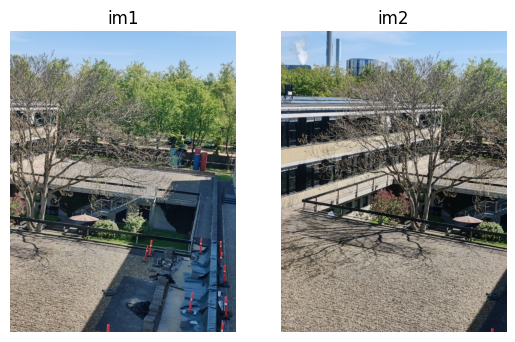

In [13]:
# Q12: homography
im1 = cv2.imread(folder + "im1.jpg")
im2 = cv2.imread(folder + "im2.jpg")
fig, ax = plt.subplots(1, 2)
ax[0].imshow(cv2.cvtColor(im1, cv2.COLOR_BGR2RGB))
ax[0].set_title("im1")
ax[0].axis("off")
ax[1].imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
ax[1].set_title("im2")
ax[1].axis("off")
plt.show()

# Initiate SIFT detector
sift = cv2.SIFT_create()

# Find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(im1, None)
kp2, des2 = sift.detectAndCompute(im2, None)

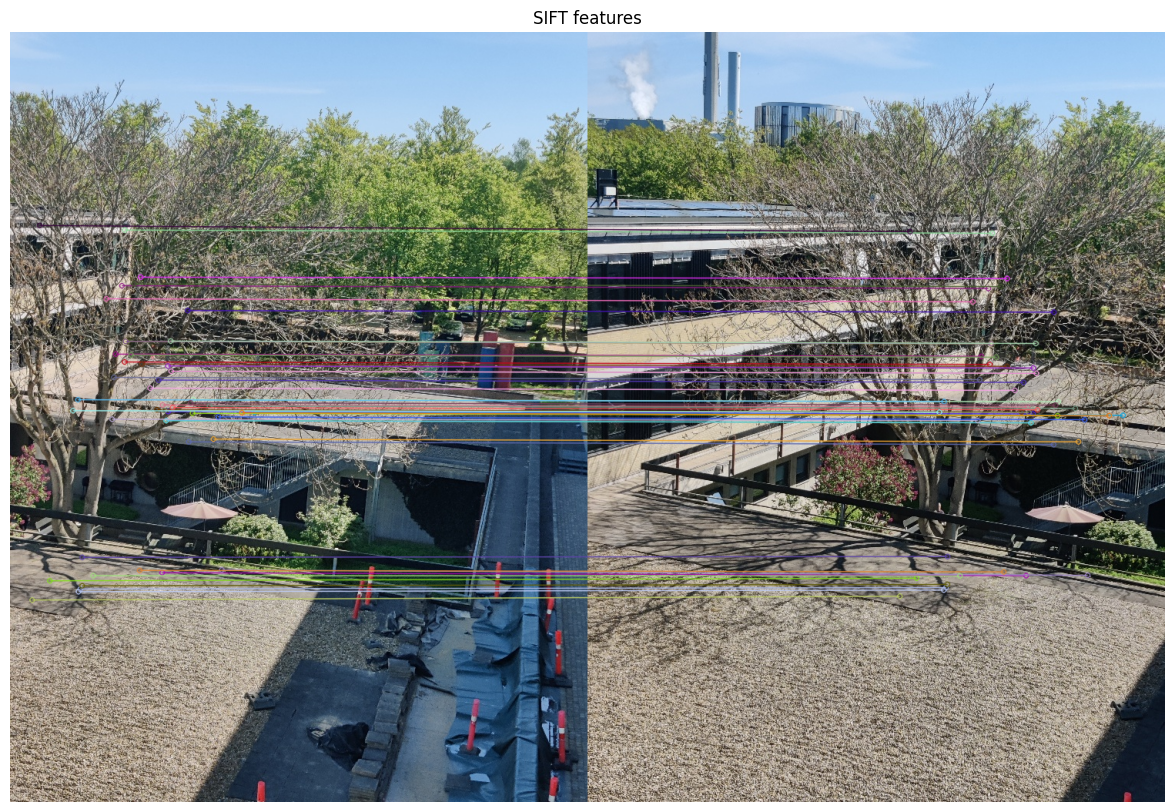

In [14]:
# Find the keypoints and descriptors with SIFT
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(im1, None)
kp2, des2 = sift.detectAndCompute(im2, None)

matches, kp1, kp2 = find_features(im1, im2)

img3 = cv2.drawMatches(
    im1,
    kp1,
    im2,
    kp2,
    matches[:50],
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("SIFT features")
plt.show()

Best consensus of 1869 out of 3407 points.


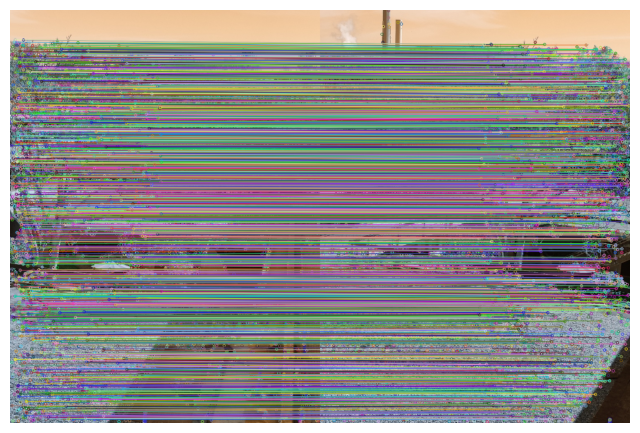

best_H:
[[ 2.60583239e-03  1.01611859e-05 -9.93191684e-01]
 [ 2.02533672e-04  2.52080251e-03 -1.16412359e-01]
 [ 4.44582910e-07 -1.87203665e-08  2.29249460e-03]]


In [15]:
# arbitrary threshold
sigma = 3   
threshold = 5.99 * sigma ** 2
best_H, best_inliers = ransac_homography(im1, im2, threshold, plot=True)
print(f"best_H:\n{best_H}")

In [16]:
best_H/best_H[0,0]

array([[ 1.00000000e+00,  3.89940117e-03, -3.81141814e+02],
       [ 7.77232153e-02,  9.67369398e-01, -4.46737709e+01],
       [ 1.70610709e-04, -7.18402556e-06,  8.79755204e-01]])

In [17]:
# Q15: epipolar

K = np.array([[300, 0, 840], [0, 300, 620.0], [0, 0, 1]], float)
R1 = cv2.Rodrigues(np.array([-2.3, -0.7, 1.0]))[0]
t1 = np.array([0.0, -1.0, 4.0], float).reshape((3,1))
R2 = cv2.Rodrigues(np.array([-0.6, 0.5, -0.9]))[0]
t2 = np.array([0.0, 0.0, 9.0], float).reshape((3,1))
R3 = cv2.Rodrigues(np.array([-0.1, 0.9, -1.2]))[0]
t3 = np.array([-1.0, -6.0, 28.0], float).reshape((3,1))

p1 = np.array([853.0, 656.0]).reshape((2,1))
p2 = np.array([814.0, 655.0]).reshape((2,1))
p3 = np.array([798.0, 535.0]).reshape((2,1))

F = fundamental_matrix(K, R1, t1, K, R2, t2)

epiline_c1 = PiInv(p2).T @ F
dist = point_line_distance(epiline_c1.T, PiInv(p1))
dist

array([[160.73201324]])

In [18]:
# Q16: triangulation, non-linear minimization

P1 = projection_matrix(K, R1, t1)
P2 = projection_matrix(K, R2, t2)
P3 = projection_matrix(K, R3, t3)

Q = triangulate_nonlin([p1, p2, p3], [P1, P2, P3])
print(f"Q:\n{Q.reshape(-1, 1)}")


Q:
[[ 0.25475588]
 [-1.5392369 ]
 [-0.14899201]]


In [19]:
# Q17: camera position
R = cv2.Rodrigues(np.array([-1.9, 0.1, -0.2]))[0]
t = np.array([-1.7, 1.3, 1.5], float)

position = -R.T @ t
position

array([ 1.75298172,  1.89539444, -0.40562912])

In [20]:
# Q18: transformation
T01 = np.vstack((np.hstack((R1,t1)), np.array([0,0,0,1])))
T02 = np.vstack((np.hstack((R2,t2)), np.array([0,0,0,1])))
T03 = np.vstack((np.hstack((R3,t3)), np.array([0,0,0,1])))

p3 = np.array([[-0.38], [0.1], [1.32]])  # 3D point in {cam3}
p3h = PiInv(p3)                 # point in {cam3}
p0h = np.linalg.inv(T03) @ p3h   # point in {world}
p2h = T02 @ p0h                  # point in {cam2}
p2 = Pi(p2h)
p2

array([[  2.1880602 ],
       [ -5.26185229],
       [-17.77577456]])

In [21]:
# Q19: ransac iterations
s = 465     # best number of inliers
m = 1177     # total number of points
p = 0.90    # probability of only inliers
n = 4       # number of points to fit model

N = np.log(1-p) / np.log(1-(s/m)**n)
N

93.36093153241097

In [22]:
# Q20: ransac threshold
chi_sq = 3.84   # m=1, 95% confidence
sigma = 1.4
threshold = chi_sq * sigma ** 2
threshold

7.526399999999999

In [23]:
# Q21: structured light
n1 = 40
n2 = 41

primary = np.array([12, 9, 10, 13, 18, 25, 33, 40, 46, 49, 48, 45, 39, 31, 23, 17])
secondary = np.array([15, 29, 43, 49, 43, 29, 15, 10])

fft_primary = np.fft.rfft(primary, axis=0)
fourier_primary = fft_primary[1]
theta_primary = np.angle(fourier_primary)

# Secondary pattern
fft_secondary = np.fft.rfft(secondary, axis=0)
fourier_secondary = fft_secondary[1]
theta_secondary = np.angle(fourier_secondary)

# Compute phase cue using heterodyne principle
theta_c = np.mod(theta_secondary - theta_primary, 2 * np.pi)

# Order of primary phase
o_primary = np.rint((n1 * theta_c - theta_primary) / (2 * np.pi))

# Estimate the phase
theta_est = np.mod((2 * np.pi * o_primary + theta_primary) / n1, 2 * np.pi)
theta_est

1.321564682705066